# Data analysis - Introduction for FYSC12 Labs

## Table of Content

* [About this Notebook](#about)

* [Importing python packages](#import)

* [Read experimental data from file](#read)
    * [Analysis Code](#help1)
    * [Plotting the data](#plot)


* [Fit of data](#fit)
    * [Fitting Gaussians](#gaussian)
    * [Calculate Peak Area](#peak_area)
    * [Fit a line - Energy calibration](#line)


* [Statistical analysis - Error propagation](#stat)

## About this Notebook <a name="about"></a>

The purpose of this _jupyter_ notebook is to introduce data analysis in the
frame of gamma spectroscopy. The example programming language is _Python3_ , but
of course most coding languages can do the job properly. If you have never
programmed before there are so many great tutorials available across the web.
There even exist plenty _Open Online Courses_ , e.g.
https://www.coursera.org/learn/python. Please have a look around for the one
that you like the best. However, note that you do not need to be an expert in
Python to pass the lab.

The data analysis can roughly be divided into four steps:
1. Read experimental data from file.
2. Fit Gaussians to peaks.
3. Calibrate the detector response.
4. Perform a statistical analysis (e.g. error propagation) and present results.

A dedicated python library, i.e. a folder with already written code, located in
`HelpCode`, have been implemented for the data analysis connected to the labs in
FYSC12 Nuclear Physics. The folder comprises functions that support 1-3 of the
above-mentioned steps.

Full Python3 coding examples of how to perform the different steps of the data
analysis is given below. Every example is finished with a template of how the
`HelpCode`-folder can be used to perform the same calculations.


## Importing python packages <a name="import"></a>

Here is **the full list of packages** needed to run the code in this Jupyter Notebook. 

In [1]:
# Packages to help importing files 
import sys, os
sys.path.append('../')

# Package that supports working with large arrays
import numpy as np  

# Package for plotting 
import matplotlib   # choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

#The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit


%load_ext autoreload
%autoreload 2
# Custom pakages prepared for you to use when analyzing experimental data from labs 
import fithelpers, histhelpers, MCA, fittingFunctions

Inserting parent directory to the path such that the analysis code in `fithelpers.py`, `histhelpers.py` and `MCA.py` can be found by `python`.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

--------------------------------------------------------------------------------------------------------------

## Test histogram

In [3]:
x = [0.5, 1.5, 2.5, 3.5, 4.5]
y = [10, 11, 5, 4, 15]

<IPython.core.display.Javascript object>


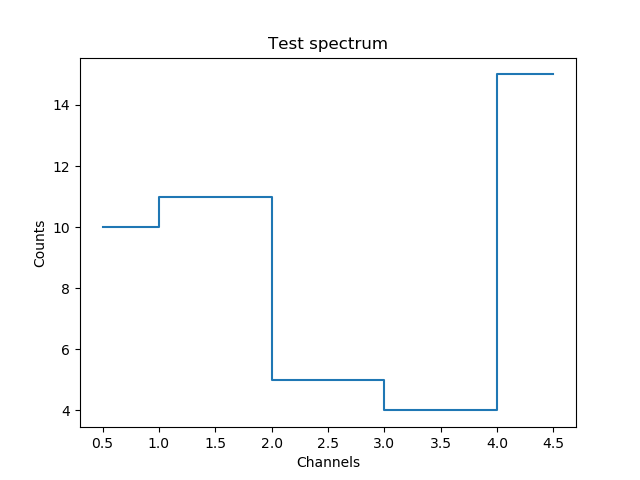

Text(0, 0.5, 'Counts')

In [4]:
plt.figure()
# with the data read in with the first routine
plt.step(x, y, where='mid')

plt.show()
plt.title("Test spectrum")
plt.xlabel("Channels")
plt.ylabel("Counts")

## Read experimental data from file <a name="read"></a>

### Loading spectrum <a name="help1"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [5]:
data = MCA.load_spectrum("test_data.Spe")

_If you are interested in how to read and write files in Python see e.g. http://www.pythonforbeginners.com/files/reading-and-writing-files-in-python or you could have a look at the source code in [MCA.py](../MCA.py)._

`data` is an object of a class `Spectrum` in which we store channels in `x` variable and counts in `y` (cf. [MCA.py](../MCA.py)). See for instance: 

In [6]:
print('x = ', data.x)
print('y = ', data.y)

x =  [5.0000e-01 1.5000e+00 2.5000e+00 ... 8.1895e+03 8.1905e+03 8.1915e+03]
y =  [0. 0. 0. ... 0. 0. 0.]


## Plotting the data <a name="plot"></a>

It is always good to visualise your data. This is how you can plot and visualise it:

<IPython.core.display.Javascript object>


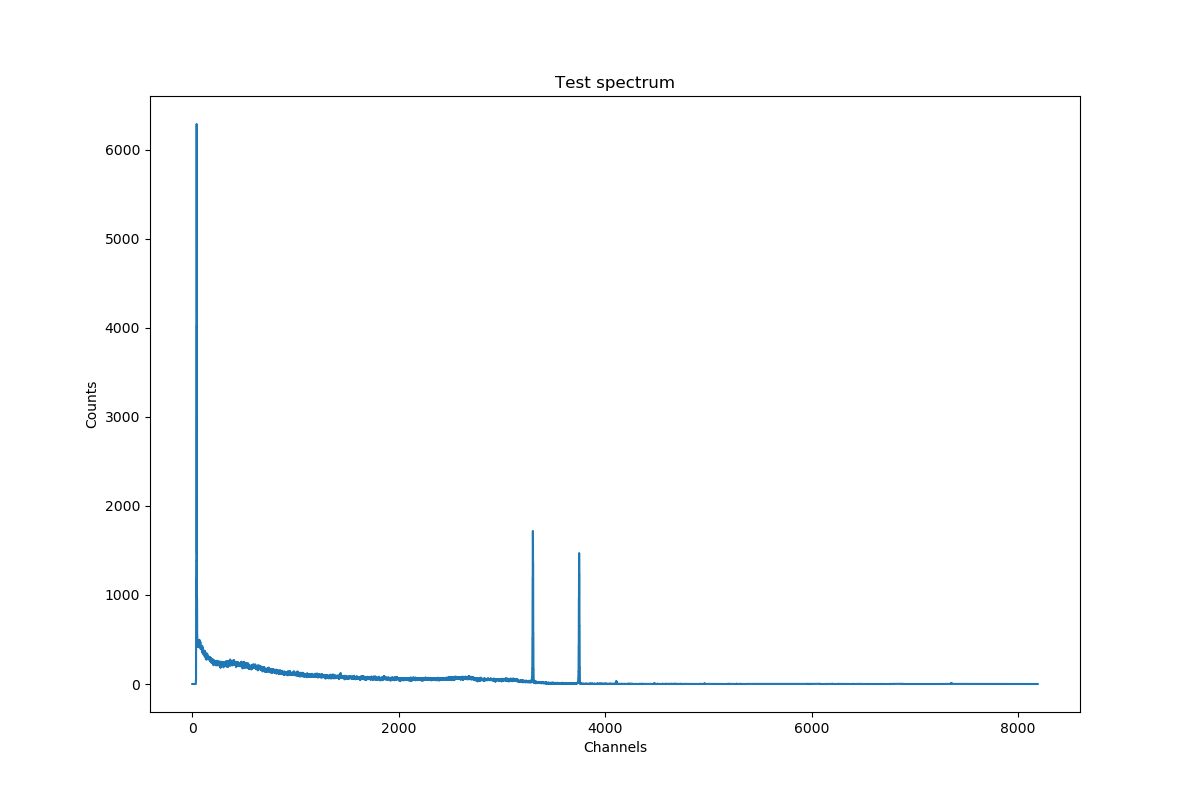

Text(0, 0.5, 'Counts')

In [7]:
plt.figure(figsize=(12, 8))
# with the data read in with the first routine
plt.step(data.x, data.y, where='mid')

plt.show()
plt.title("Test spectrum")
plt.xlabel("Channels")
plt.ylabel("Counts")

#plt.savefig("test_spectrum.png") #This is how you save the figure

## Could be useful to see this in log scale..?
#plt.yscale('log')
#plt.ylim(ymin=1)

## Analyzing data <a name="fit"></a>

In $\gamma$-ray (or other radiation) spectroscopy measurements, the goal is usually to determine the energy and the intensity of the radiation. To find the energy, the centroid of a peak must be determined. Area of the peak represents to the intensity of the radiation. A good way to find the peak centroid and area is to fit a Gaussian to the peak. 


### Fitting a Gaussian <a name="gaussian"></a>

Read up on the Gaussian function here: [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)

The following code shows how to use the function `curve_fit` to fit a peak in
the data that was read in above (i.e. you will need to execute the above code
section before this section will work).

_The function `curve_fit` from `scipy.optimize` module does the job for you and the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) contains all the valuable information on how to use the function. It uses a method called least squares which you can read about in most course literature on statistics
and for instance on [Wolfram Alpha](http://mathworld.wolfram.com/LeastSquaresFitting.html)._

To fit a Gaussian to your peak you need to provide `curve_fit` with some initial guess for its constants:

<IPython.core.display.Javascript object>


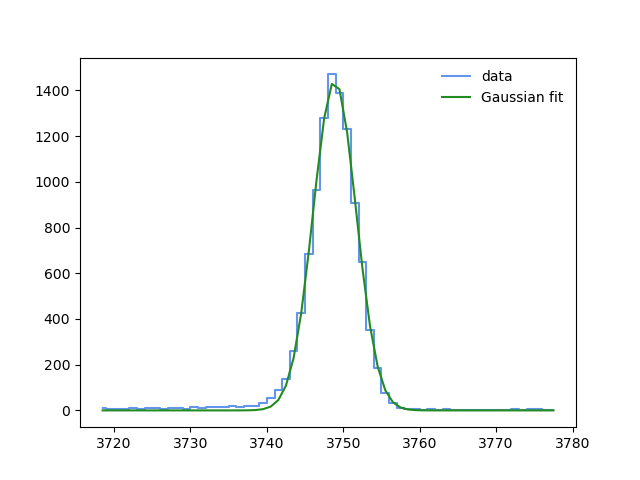

Estimates of (A mu sigma) = ( 1441.0074810027995 3748.8724231322044 2.802353401812698 )

Covariance matrix = 
 [[ 8.08189624e+01  2.08883647e-06 -1.04780278e-01]
 [ 2.08883647e-06  4.07537049e-04 -4.06181151e-09]
 [-1.04780278e-01 -4.06181151e-09  4.07537042e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 80.818962392164 0.0004075370490065054 0.00040753704160661954 ]


In [8]:
##### Your initial guess here:

mu_guess = 3748.8 # a guess for position of peak centroid
n = 30 #number of points on each side to include in fit


##### Now we can perform the fit:
idx = (np.abs(data.x-mu_guess)).argmin() # find index of the mu guess value in x array
A_guess = data.y[idx] # a guess for the amplitude of the peak (you do not need to change it) 
sigma_guess = 1 # guess for sigma 

from scipy.optimize import curve_fit

def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

guess = [A_guess, mu_guess, sigma_guess]

estimates, covar_matrix = curve_fit(GaussFunc,
                                    data.x[idx-n:idx+n],
                                    data.y[idx-n:idx+n],
                                    p0=guess)

A, mu, sigma = estimates[0], estimates[1], estimates[2]

plt.figure()
plt.step(data.x[idx-n:idx+n],data.y[idx-n:idx+n], where='mid', color='cornflowerblue', label='data')
plt.plot(data.x[idx-n:idx+n], GaussFunc(data.x[idx-n:idx+n], A, mu, sigma), color='forestgreen', label = 'Gaussian fit')
plt.legend(loc='upper right', frameon=False)
plt.show()

print("Estimates of (A mu sigma) = (", A, mu, sigma, ")\n")
print("Covariance matrix = \n", covar_matrix, "\n")
print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", covar_matrix[0][0], covar_matrix[1][1], covar_matrix[2][2], "]" )


### Calculating Peak Area <a name="peak_area"></a>

There are different ways in how to calculate the area of a peak in a spectrum. The by far easiest method is to calculate the area of the fitted Gaussian function (see [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)).

In [9]:
Area = np.sqrt(2*np.pi)*A*np.abs(sigma)
print('Area of peak is: ', Area)

Area of peak is:  10122.296920653085


### Analysis code

To produce the same results you can just use the function `perform_Gaussian_fit` from `fittingFunctions` package. 


**You can just copy the following cell and use it in your Jupyter Notebooks with solutions for laboratories.**

<IPython.core.display.Javascript object>


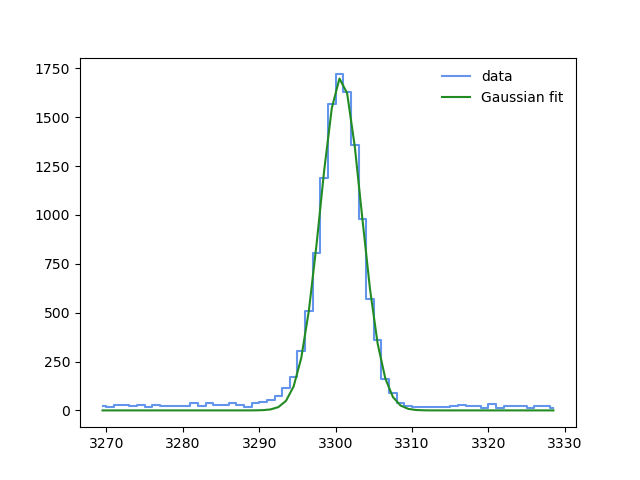

Estimates of (A mu sigma) = ( 1701.438287027319 3300.6739637051596 2.690781632536818 )

Covariance matrix = 
 [[ 2.62193671e+02  5.05274805e-06 -2.76435636e-01]
 [ 5.05274805e-06  8.74353634e-04 -7.99117031e-09]
 [-2.76435636e-01 -7.99117031e-09  8.74353625e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 262.19367129620366 0.0008743536336408339 0.0008743536253622023 ]

Area of peak is:  11475.842788639093


In [10]:
mu_guess = 3300 # guess of a position of a peak centroid 
n = 30 #number of points on each side to include in fit

gauss = fittingFunctions.perform_Gaussian_fit(data.x, data.y, mu_guess, n)

Area = np.sqrt(2*np.pi)*gauss.A*np.abs(gauss.sigma)
print('Area of peak is: ', Area)

## Influence of initial guess on your Gaussian fit 

Now let's look at how our initial guess of the position of peak centroid and number of points influence out fit. Change numbers for mu_guess and n, and check how the change affects your fit.

In [11]:
from ipywidgets import interact, interactive, fixed, widgets

def plot_interactive_fit(mu_guess, n):
    gauss = fittingFunctions.perform_Gaussian_fit(data.x, data.y, mu_guess, n)
    
interactive_plot = interactive(plot_interactive_fit, mu_guess=(3200, 3400, 1), n=(15, 45, 1), continuous_update=False)
interactive_plot.children[0].description=r'mu_guess' # slider
interactive_plot.children[1].description=r'n'
interactive_plot.children[0].continuous_update = True
interactive_plot.children[1].continuous_update = False
interactive_plot

interactive(children=(IntSlider(value=3300, description='mu_guess', max=3400, min=3200), IntSlider(value=30, c…

In [12]:
# mu_guess = 3300 # guess of a position of a peak centroid 
# n = 30 #number of points on each side to include in fit
# fittingFunctions.perform_Gaussian_fit_with_widget(data.x, data.y, mu_guess, n)

## Improving your fit - accounting for a linear background

Often times we want to subtract the background from our peak as the peak may be on the Compton continuum of other peaks higher in energy. It is needed to be able to correctly determine the intensity of the peak.  

In [13]:
# def plot_interactive_fit_background(mu_guess, n, left_selection, right_selection):
#     gauss = fittingFunctions.perform_Gaussian_fit(data.x, data.y, mu_guess, n, left_selection, right_selection)

# interactive_plot = interactive(plot_interactive_fit_background, mu_guess=(3280, 3320, 1), n=fixed(30), left_selection = widgets.IntRangeSlider(values=[3285, 3290], min=3280, max=3280+15), right_selection = widgets.IntRangeSlider(values=[3310, 3312], min=3300+15, max=3320))
# interactive_plot.children[0].description=r'mu_guess' # slider
# interactive_plot.children[1].description=r'n'
# interactive_plot.children[0].continuous_update = True
# interactive_plot.children[1].continuous_update = False
# interactive_plot

In [14]:
mu_guess_widget = widgets.IntSlider(value=3300, min=3280, max=3320, step=1)
n_widget = widgets.IntSlider(value=30, min=15, max=45, step=1)
left_selection_widget = widgets.IntRangeSlider(values=[3285, 3290], min=3280, max=3280+15)
right_selection_widget = widgets.IntRangeSlider(values=[3310, 3312], min=3300+15, max=3320)

def update_selections(*args):
    left_selection_widget.min = mu_guess_widget.value - n_widget.value
    left_selection_widget.max = mu_guess_widget.value - int(n_widget.value/4)
    right_selection_widget.min = mu_guess_widget.value + int(n_widget.value/4)
    right_selection_widget.max = mu_guess_widget.value + n_widget.value
    
    
left_selection_widget.observe(update_selections, 'value')
right_selection_widget.observe(update_selections, 'value')

def plot_interactive_fit_background(mu_guess, n, left_selection, right_selection):
    gauss = fittingFunctions.perform_Gaussian_fit(data.x, data.y, mu_guess, n, left_selection, right_selection)

    
    
interactive_plot = interactive(plot_interactive_fit_background, mu_guess=mu_guess_widget, n=n_widget, left_selection=left_selection_widget, right_selection=right_selection_widget)
interactive_plot.children[0].description=r'mu_guess' # slider
interactive_plot.children[1].description=r'n'
interactive_plot.children[0].continuous_update = True
interactive_plot.children[1].continuous_update = False
interactive_plot

interactive(children=(IntSlider(value=3300, description='mu_guess', max=3320, min=3280), IntSlider(value=30, c…

### Analysis code

To make a Gaussian fit that takes into account the background just use a function `perform_Gaussian_fit` from `fittingFunctions` package with specifying `left_selection` and `right_selection` arrays. _In case you are interested in how the fit was performed you have a look on the function `perform_Gaussian_fit` [fittingFunctions.py](../fittingFunctions.py)._


**You can just copy the following cell and use it in your Jupyter Notebooks with solutions for laboratories.**

Linear fit coefficients (k m) = ( -0.6129893238491206 2046.9773131717398 )



<IPython.core.display.Javascript object>


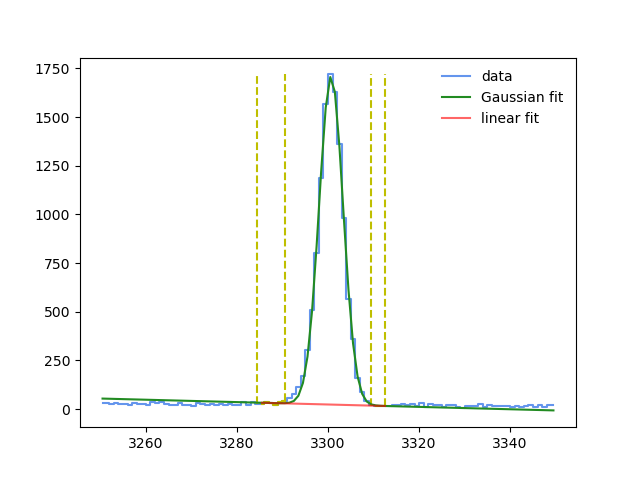

Estimates of (A mu sigma) = ( 1685.8809625252557 3300.6825819309583 2.6343334321132863 )

Covariance matrix = 
 [[ 1.08215758e+02  2.10540136e-06 -1.12731272e-01]
 [ 2.10540136e-06  3.52305620e-04 -3.29067568e-09]
 [-1.12731272e-01 -3.29067568e-09  3.52305619e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 108.21575782028415 0.0003523056196280858 0.00035230561863014697 ]



In [15]:
mu_guess = 3300.4 # guess of a position of a peak centroid 
n = 50 #number of points on each side to include in fit

#Let's select channels on both sides of our fit to which we want to fit our line: 
left_selection = [3285, 3290]
right_selection = [3310, 3312]

gauss = fittingFunctions.perform_Gaussian_fit(data.x, data.y, mu_guess, n, left_selection, right_selection)

## Fit a line - Energy calibration <a name="line"></a>

In spectroscopy experiments it is often essential to calibrate the detector response with respect to a known energies emitted from a so called calibration source. The relationship between the detector response and the energy is mostly assumed linear. The code below exemplifies how to estimate the linear calibration for 'random data'.

Estimates of (k m) = ( 0.51544342764661 0.4022935634807532 )



<IPython.core.display.Javascript object>


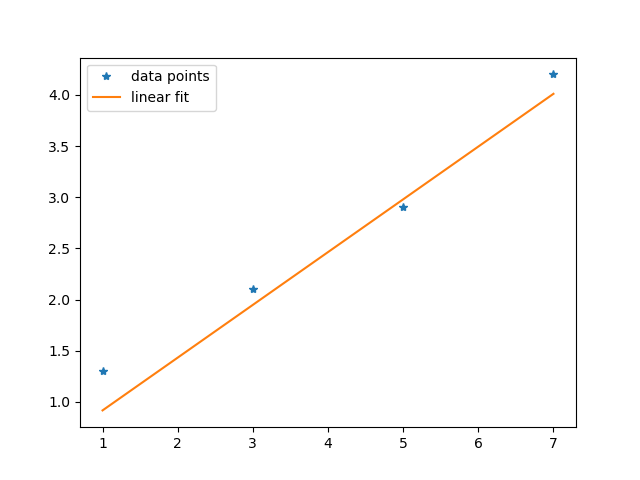

In [16]:
# x and y are some 'random data'
x = np.asarray([1,3,5,7])
y = np.asarray([1.3, 2.1, 2.9, 4.2])

#If you are more or less uncertain about your y-values this can be used in the fit by including the following line.
sigmay = np.asarray([0.5, 0.3, 0.1, 0.2])

# Define the linear function which you want to fit.
def LineFunc(x, k, m):
    return k*x+m

# As for the Gaussian fit the function curve_fit needs a guess for the parameters to be estimated.
guess = [2, 1]

# Perform the fit
estimates, covar_matrix = curve_fit(LineFunc,
                                    x,
                                    y,
                                    p0 = guess,
                                    sigma = sigmay)

print("Estimates of (k m) = (", estimates[0], estimates[1], ")\n")

# plot the result
plt.figure()
plt.plot(x,y, linestyle="", marker="*", label='data points')
plt.plot(x, LineFunc(x, estimates[0], estimates[1]), label='linear fit')
plt.legend(loc='upper left')
plt.show()

## Statistical analysis - Error propagation<a name="stat"></a>

Background theory and instructions on how to perform statistical analysis on
experimental data, with error propagation, can be found in the document
http://www.fysik.lu.se/fileadmin/fysikportalen/UDIF/Bilder/FYSA31_KF_error.pdf, but of course also easily through a google search.